# Sprint 2

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import utils

In [70]:
df = utils.import_attrition_data()
df

['data\\customer_attrition_0.csv', 'data\\customer_attrition_1.csv', 'data\\customer_attrition_2.csv', 'data\\customer_attrition_3.csv', 'data\\customer_attrition_4.csv']


,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1.0,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0.0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1.0,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0.0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1.0,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
10001,771,France,Male,39,5,0.00,2,1.0,0,96270.64,0
10002,516,France,Male,35,10,57369.61,1,1.0,1,101699.77,0
10003,709,France,Female,36,7,0.00,1,0.0,1,42085.58,1
10004,772,Germany,Male,42,3,75075.31,2,1.0,0,92888.52,1


# AT21

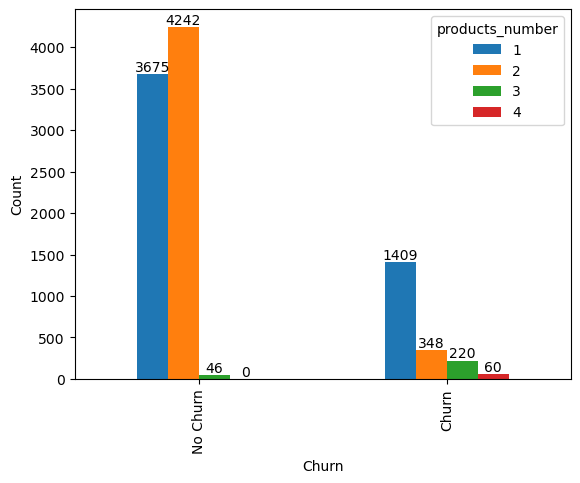

In [71]:
df_agg = df.pivot_table(index="churn", columns=["products_number"], aggfunc="size")

df_agg.fillna(0, inplace=True)

ax = df_agg.plot.bar()

ax.set_xticklabels(["No Churn", "Churn"])
ax.set_xlabel("Churn")
ax.set_ylabel("Count")

for i in ax.containers:
    ax.bar_label(i)


plt.show()

# AT22

In [72]:
relevant_columns = (df.dtypes != object)
df_corr = df.loc[:, relevant_columns].corr()
df_corr

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
credit_score,1.000000,-0.004646,0.002120,0.007797,0.012267,-0.005352,0.025399,-0.000095,-0.026884
age,-0.004646,1.000000,-0.009997,0.028308,-0.030680,-0.011646,0.085472,-0.007201,0.285323
tenure,0.002120,-0.009997,1.000000,-0.012254,0.013444,0.022461,-0.028362,0.007784,-0.014001
balance,0.007797,0.028308,-0.012254,1.000000,-0.304180,-0.014985,-0.010084,0.012797,0.118533
products_number,0.012267,-0.030680,0.013444,-0.304180,1.000000,0.003161,0.009612,0.014204,-0.047820
credit_card,-0.005352,-0.011646,0.022461,-0.014985,0.003161,1.000000,-0.012025,-0.010140,-0.007476
active_member,0.025399,0.085472,-0.028362,-0.010084,0.009612,-0.012025,1.000000,-0.011421,-0.156128
estimated_salary,-0.000095,-0.007201,0.007784,0.012797,0.014204,-0.010140,-0.011421,1.000000,0.012097
churn,-0.026884,0.285323,-0.014001,0.118533,-0.047820,-0.007476,-0.156128,0.012097,1.000000


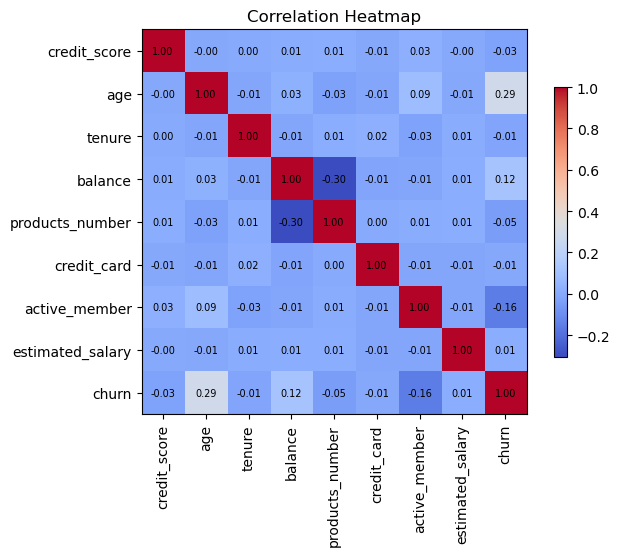

In [75]:
fig, ax = plt.subplots(figsize=(7, 5))
img = ax.imshow(df_corr, cmap="coolwarm", interpolation="nearest")
fig.colorbar(img, shrink=0.7)

for i in range(df_corr.shape[0]):
    for j in range(df_corr.shape[1]):
        ax.text(j, i, f'{df_corr.iloc[i, j]:.2f}', ha="center", va="center", color="black", fontsize=7)

ax.set_xticks(np.arange(len(df_corr.columns)), df_corr.columns, rotation=90)
ax.set_yticks(np.arange(len(df_corr.columns)), df_corr.columns)
ax.set_title("Correlation Heatmap")

plt.show()